#load libraries (adv ml)

In [1]:
# this will help in making the Python code more structured automatically (good coding practice, BUT HAS NEVER WORKED)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px #3d interactive graphs can save as html and put on websites

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)




#Load and copy data set and mount Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data set
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Backpack Prediction Challenge/train.csv')

In [ ]:
# load data set
datatest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Backpack Prediction Challenge/test.csv')

In [ ]:
# # load data set
# dataxtratrng = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Backpack Prediction Challenge/training_extra.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

In [ ]:
# copying data to another varaible to avoid any changes to original data
dftest = datatest.copy()

In [ ]:
# # copying data to another varaible to avoid any changes to original data
# dfxtra = dataxtratrng.copy()

#data overview, sanity checks, statistical summary, observations

##overview

In [ ]:
df.shape

(300000, 11)

In [ ]:
df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.00,Yes,No,Tote,Black,11.61,112.16
1,Jansport,Canvas,Small,10.00,Yes,Yes,Messenger,Green,27.08,68.88
2,Under Armour,Leather,Small,2.00,Yes,No,Messenger,Red,16.64,39.17
3,Nike,Nylon,Small,8.00,Yes,No,Messenger,Green,12.94,80.61
4,Adidas,Canvas,Medium,1.00,Yes,Yes,Messenger,Green,17.75,86.02


In [ ]:
df.tail()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299995,Adidas,Leather,Small,9.00,No,No,Tote,Blue,12.73,130.00
299996,Jansport,Leather,Large,6.00,No,Yes,Tote,Blue,26.63,19.86
299997,Puma,Canvas,Large,9.00,Yes,Yes,Backpack,Pink,11.90,111.41
299998,Adidas,Nylon,Small,1.00,No,Yes,Tote,Pink,6.18,115.89
299999,Under Armour,Canvas,Small,2.00,No,Yes,Backpack,Black,18.57,26.73


* I can see that while there's not a pressing need to normalize data later in the project due to different scales of the values, I probably will.
* There is an id column that can be dropped for the majority of the project and added back if needed for submitting the results to the Kaggle competition.  This is just used as a unique identifier and will not assist in predictions.

In [5]:
###########################################################################
# drop ID column as it is not a determining factor for a model
df = df.drop('id',axis=1)
#verify
df.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.00,Yes,No,Tote,Black,11.61,112.16
1,Jansport,Canvas,Small,10.00,Yes,Yes,Messenger,Green,27.08,68.88


In [ ]:
###########################################################################
# drop ID column as it is not a determining factor for a model
dftest = dftest.drop('id',axis=1)
#verify
dftest.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.00,No,No,Tote,Green,20.67
1,Nike,Canvas,Medium,7.00,No,Yes,Backpack,Green,13.56


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


* There are 7 string data type columns.  These are categorical data.  Later in the project the kept columns will be one-hot encoded to numeric values for the models.  THis will add many columns to the data set, so I need to be thoughtful about this moving forward.
* There are 3 float numeric columns.

In [ ]:
# checking for duplicate values in the data, summed
df.duplicated().sum()

0

In [ ]:
# checking for missing values in each column of the data set
df.isna().sum()

,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138
Price,0


In [6]:
# Check for missing values WITH COOL VISUAL GRAPH
df_na = (df.isna()
                    .sum()
                    .reset_index()
                    .sort_values(0, ascending=False)
                ).rename(columns={'index':'col',0:'na'})

df_na['percentage_na'] = (df_na['na'] / len(df)).round(2)

df_na.style.background_gradient()

,col,na,percentage_na
7,Color,9950,0.030000
0,Brand,9705,0.030000
1,Material,8347,0.030000
6,Style,7970,0.030000
4,Laptop Compartment,7444,0.020000
5,Waterproof,7050,0.020000
2,Size,6595,0.020000
8,Weight Capacity (kg),138,0.000000
3,Compartments,0,0.000000
9,Price,0,0.000000


There are missing values to consider for the various models I will build.  There is not a lot of missing values in the training data set, however.

In [ ]:
df.nunique()

,0
Brand,5
Material,4
Size,3
Compartments,10
Laptop Compartment,2
Waterproof,2
Style,3
Color,6
Weight Capacity (kg),181596
Price,48212


* There are 5 brands in the data set.
* There are 4 material types.
* There are 3 backpacl sizes.
* There are 10 compartment values.
* There are 2 types of waterproofint of the backpacks.
* There are 3 styles and 6 colors.
* There are many values in the weight column.
* There are 48,212 different prices.

As a first instinct, I am thinking it may be helpful to group prices together, but I will look at it further into the project.


In [ ]:
# check all values in the column
df['Brand'].value_counts()

,count
Brand,
Adidas,60077
Under Armour,59992
Nike,57336
Puma,56814
Jansport,56076


In [ ]:
# check all values in the column
df['Material'].value_counts()

,count
Material,
Polyester,79630
Leather,73416
Nylon,70603
Canvas,68004


In [ ]:
# check all values in the column
df['Size'].value_counts()

,count
Size,
Medium,101906
Large,98643
Small,92856


In [ ]:
# check all values in the column
df['Compartments'].value_counts()

,count
Compartments,
1.00,31568
4.00,31498
2.00,30595
3.00,30293
7.00,30158
9.00,29965
5.00,29959
10.00,29815
8.00,28909


In [ ]:
# check all values in the column
df['Laptop Compartment'].value_counts()

,count
Laptop Compartment,
Yes,148342
No,144214


In [ ]:
# check all values in the column
df['Waterproof'].value_counts()

,count
Waterproof,
Yes,148077
No,144873


In [ ]:
# check all values in the column
df['Style'].value_counts()

,count
Style,
Messenger,100031
Tote,97438
Backpack,94561


In [ ]:
# check all values in the column
df['Color'].value_counts()

,count
Color,
Pink,51690
Gray,50280
Blue,48097
Red,47219
Green,46386
Black,46378


In [ ]:
# check entries, to list all rows
# pd.set_option('display.max_rows', None)

In [ ]:
# check all values in the column
df['Weight Capacity (kg)'].value_counts()

,count
Weight Capacity (kg),
5.00,4286
30.00,185
11.90,123
22.90,116
14.91,101
...,...
6.94,1
8.09,1
22.01,1


In [ ]:
# check all values in the column
df['Price'].value_counts()

,count
Price,
150.00,5528
15.00,693
23.60,22
17.32,21
62.36,21
...,...
82.31,1
90.79,1
111.37,1


In [ ]:
# Assuming 'data' is your DataFrame
# Check for missing values in a row and save as a variable

missing_rows = data[data.isnull().any(axis=1)]

# Display rows with missing values
missing_rows


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
5,5,Nike,Canvas,Medium,10.00,No,Yes,NaN,Black,7.24,20.02
6,6,Nike,NaN,Large,3.00,No,No,Backpack,Green,6.83,84.81
10,10,Nike,Polyester,Large,1.00,Yes,No,Backpack,NaN,27.81,68.31
11,11,Nike,Polyester,NaN,10.00,No,No,NaN,Gray,13.70,23.26
21,21,Under Armour,Polyester,NaN,9.00,Yes,Yes,Messenger,Gray,11.22,35.46
...,...,...,...,...,...,...,...,...,...,...,...
299975,299975,Jansport,Leather,Medium,8.00,No,Yes,Messenger,NaN,20.36,110.42
299978,299978,NaN,Canvas,Large,6.00,Yes,No,Tote,Gray,5.00,50.79
299983,299983,Puma,Nylon,Large,9.00,Yes,Yes,NaN,Black,25.50,54.19
299989,299989,Nike,NaN,NaN,2.00,Yes,Yes,Messenger,Green,NaN,30.30


###to see all rows and columns of a 250 shape dataset

##statisctical summary (numeric and catagorical)

In [ ]:
# summary statistics of numeric variables, transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Compartments,300000.00,5.44,2.89,1.00,3.00,5.00,8.00,10.00
Weight Capacity (kg),299862.00,18.03,6.97,5.00,12.10,18.07,24.00,30.00
Price,300000.00,81.41,39.04,15.00,47.38,80.96,115.02,150.00


Observations:
* The median values for compartments is 5 and the mean is close in value, at 5.44, which is slightly higher so there may be outliers pulling the average higher than the median.  The range is 1 to 10 compartments.
* The median weight is 18.07 and the mean is 18.03 which are comparable values.  The range is from 5 to 30 kg.
* The median for price is 80.96 and the is lower at 81.41.  There may be outliers pulling the average slighly higher.  The range of prices is $15 to $150.  I will use this to create price categories later in the

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


In [ ]:
# define a list of columns with encoded values
count_cats = ['Brand','Material','Size','Laptop Compartment','Waterproof','Style','Color']

# iterate over the columns and print the value counts and percentages for columnss with encoded values
for col in count_cats:
  print(f"\nValue counts for column '{col}':")
  print(df[col].value_counts().reset_index(name='Count'))
  print(f"\nPercentages:")
  print((df[col].value_counts() / df[col].shape[0]) * 100)
  print('*'*50)


Value counts for column 'Brand':
          Brand  Count
0        Adidas  60077
1  Under Armour  59992
2          Nike  57336
3          Puma  56814
4      Jansport  56076

Percentages:
Brand
Adidas         20.03
Under Armour   20.00
Nike           19.11
Puma           18.94
Jansport       18.69
Name: count, dtype: float64
**************************************************

Value counts for column 'Material':
    Material  Count
0  Polyester  79630
1    Leather  73416
2      Nylon  70603
3     Canvas  68004

Percentages:
Material
Polyester   26.54
Leather     24.47
Nylon       23.53
Canvas      22.67
Name: count, dtype: float64
**************************************************

Value counts for column 'Size':
     Size   Count
0  Medium  101906
1   Large   98643
2   Small   92856

Percentages:
Size
Medium   33.97
Large    32.88
Small    30.95
Name: count, dtype: float64
**************************************************

Value counts for column 'Laptop Compartment':
  Laptop Compartme

#modify data set or columns

###creating price group categories to add as columns in a different dataframe (ie to get counts of rows in each price catgory) (and percentages by other variables in the dataset)

create some reasonable price categories based on the range (\$5 to \$150):

* Low: \$15 - \$50
* Medium: \$50 - \$100
* High: \$100 - \$150

In [ ]:
# create dataframe with price categories with AI/Chat GPT
df_price_groups = df

def categorize_price(df_price_groups):
    """Creates a price group column based on specified bins and labels."""
    price_groups = pd.cut(df_price_groups['Price'], bins=[15,50, 100, 150],
                          labels=['15-50', '50-100', '100-150'], right = False)
    return df.assign(price_group=price_groups)

# Create a new dataframe with the price group column
df_w_price_groups = categorize_price(df_price_groups.copy())

#check new dataframe for new column
df_w_price_groups.head(5)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,price_group
0,Jansport,Leather,Medium,7.00,Yes,No,Tote,Black,11.61,112.16,100-150
1,Jansport,Canvas,Small,10.00,Yes,Yes,Messenger,Green,27.08,68.88,50-100
2,Under Armour,Leather,Small,2.00,Yes,No,Messenger,Red,16.64,39.17,15-50
3,Nike,Nylon,Small,8.00,Yes,No,Messenger,Green,12.94,80.61,50-100
4,Adidas,Canvas,Medium,1.00,Yes,Yes,Messenger,Green,17.75,86.02,50-100


In [ ]:
# get the value counts of the 'price_group' column to verify
df_w_price_groups['price_group'].value_counts()

,count
price_group,
50-100,111097
100-150,102624
15-50,80751


In [ ]:
# calculate and see the percentages of size by price categories
percentagesS = df_w_price_groups.groupby('price_group')['Size'].value_counts(normalize=True) * 100
percentagesS

price_group  Size  
15-50        Medium   34.48
             Large    33.86
             Small    31.66
50-100       Medium   35.15
             Large    33.14
             Small    31.71
100-150      Medium   34.84
             Large    33.56
             Small    31.60
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of brand by price categories
percentagesB = df_w_price_groups.groupby('price_group')['Brand'].value_counts(normalize=True) * 100
percentagesB

price_group  Brand       
15-50        Adidas         21.03
             Under Armour   20.25
             Nike           19.99
             Puma           19.56
             Jansport       19.17
50-100       Adidas         20.90
             Under Armour   20.65
             Puma           19.68
             Nike           19.53
             Jansport       19.23
100-150      Under Armour   21.10
             Adidas         20.29
             Nike           19.75
             Puma           19.44
             Jansport       19.42
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of style by price categories
percentagesSt = df_w_price_groups.groupby('price_group')['Style'].value_counts(normalize=True) * 100
percentagesSt

price_group  Style    
15-50        Messenger   34.10
             Tote        33.68
             Backpack    32.22
50-100       Messenger   34.51
             Tote        33.11
             Backpack    32.38
100-150      Messenger   34.12
             Tote        33.36
             Backpack    32.51
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of color by price categories
percentagesC = df_w_price_groups.groupby('price_group')['Color'].value_counts(normalize=True) * 100
percentagesC

price_group  Color
15-50        Pink    17.78
             Gray    17.23
             Red     16.84
             Black   16.68
             Blue    15.97
             Green   15.49
50-100       Gray    18.02
             Pink    17.78
             Blue    16.61
             Green   15.97
             Black   15.82
             Red     15.81
100-150      Pink    17.89
             Blue    17.12
             Gray    16.76
             Green   16.37
             Red     16.26
             Black   15.60
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of waterproofby price categories
percentagesW = df_w_price_groups.groupby('price_group')['Waterproof'].value_counts(normalize=True) * 100
percentagesW

price_group  Waterproof
15-50        Yes          50.94
             No           49.06
50-100       Yes          50.33
             No           49.67
100-150      Yes          50.39
             No           49.61
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of material by price categories
percentagesM = df_w_price_groups.groupby('price_group')['Material'].value_counts(normalize=True) * 100
percentagesM

price_group  Material 
15-50        Polyester   27.20
             Leather     25.89
             Nylon       24.37
             Canvas      22.55
50-100       Polyester   26.72
             Leather     25.22
             Nylon       24.60
             Canvas      23.46
100-150      Polyester   28.06
             Leather     24.53
             Canvas      23.74
             Nylon       23.66
Name: proportion, dtype: float64

In [ ]:
# calculate and see the percentages of  size by price categories
percentagesLC = df_w_price_groups.groupby('price_group')['Laptop Compartment'].value_counts(normalize=True) * 100
percentagesLC

price_group  Laptop Compartment
15-50        Yes                  51.07
             No                   48.93
50-100       Yes                  50.24
             No                   49.76
100-150      Yes                  50.78
             No                   49.22
Name: proportion, dtype: float64

After comparing percentages of pricing categories by other variables in the dataset, I see there are some noticable patterns ( ie Brands), and that the set is evenly distributed around the pricing categories.

Visuals of this are below.

#EDA

##univariate analysis

###functions and code to call

histogram with boxplot (numeric continuous)

In [8]:
# function to create histograms with box plots for univariate analysis
def histogram_boxplot(data, feature, figsize=(6, 4), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (8,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

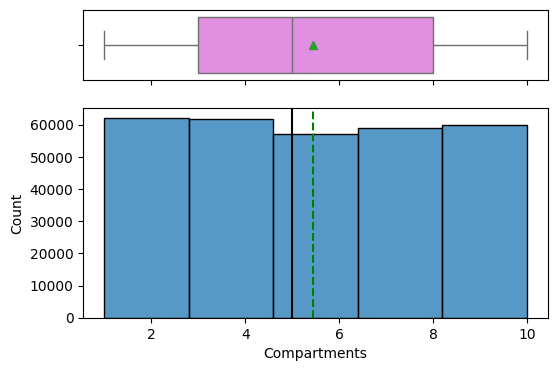

In [9]:
#visualize compartments column histogram and distribution
histogram_boxplot(df,'Compartments', kde=False, bins=5)

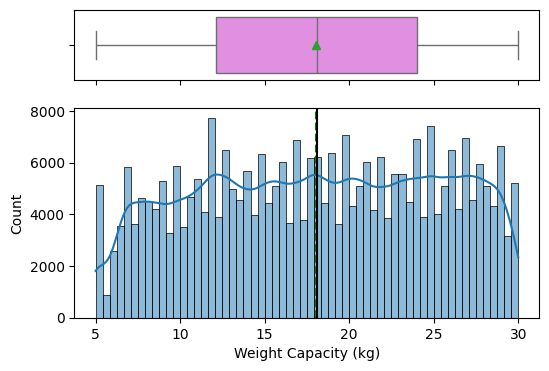

In [ ]:
#visualize weight capacity (kg) column histogram and distribution
histogram_boxplot(df,'Weight Capacity (kg)', bins=60)

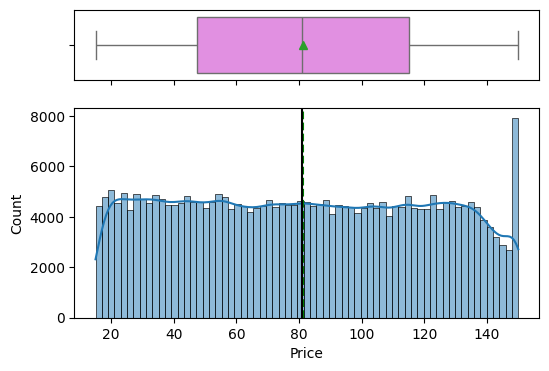

In [ ]:
#visualize column histogram and distribution
histogram_boxplot(df,'Price')  #, bins=60)

labeled barplots (numeric, discrete, integer)

In [ ]:
# function to create labeled barplots for univariate analysis
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    plt.xticks(rotation=90, fontsize=9)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 4),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

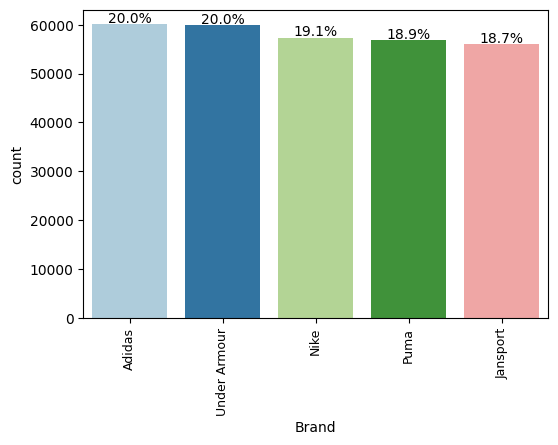

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Brand',perc=True)

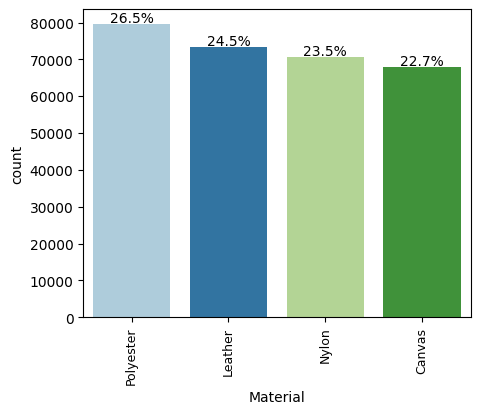

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Material',perc=True)

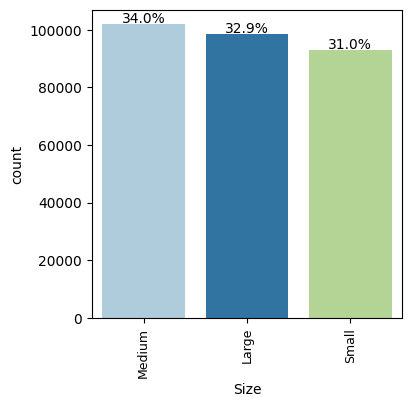

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Size',perc=True)

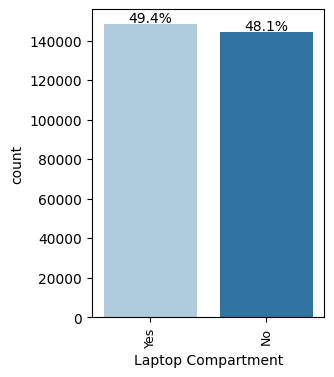

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Laptop Compartment',perc=True)

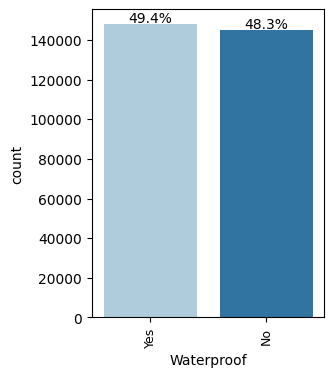

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Waterproof',perc=True)

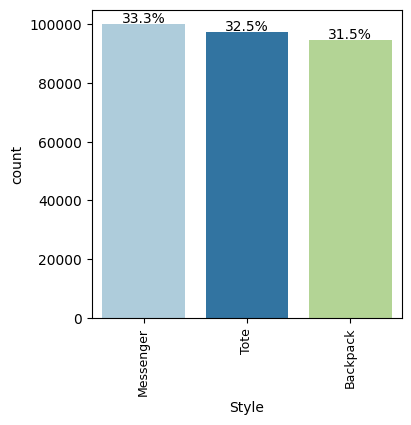

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Style',perc=True)

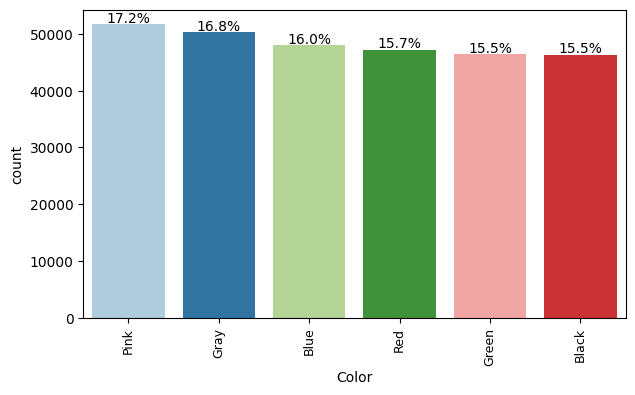

In [ ]:
#visualize column bar graph
labeled_barplot(df,'Color',perc=True)

find all outliers in a column and percentage of outliers

In [ ]:
# find the number of outliers in the column

Q1inc = df['Compartments'].quantile(0.25)  # First quartile (25th percentile)
Q3inc = df['Compartments'].quantile(0.75)  # Third quartile (75th percentile)
IQRinc = Q3inc - Q1inc  # Interquartile range

lower_bound_inc = Q1inc - 1.5 * IQRinc  # Lower outlier bound
upper_bound_inc = Q3inc + 1.5 * IQRinc # Upper outlier bound

outlier_count_inc = (df['Compartments'] < lower_bound_inc) | (df['Compartments'] > upper_bound_inc)
outlier_count_inc = outlier_count_inc.sum()  # Number of outliers

print("Number of outliers in 'Compartments' column:", outlier_count_inc)

Number of outliers in 'Compartments' column: 0


In [ ]:
# find percentages of outliers in the column
percentage_outlier_inc = ((outlier_count_inc)/(df.shape[0])) * 100
percentage_outlier_inc

0.0

In [ ]:
# find the number of outliers in the column

Q1inc = df['Weight Capacity (kg)'].quantile(0.25)  # First quartile (25th percentile)
Q3inc = df['Weight Capacity (kg)'].quantile(0.75)  # Third quartile (75th percentile)
IQRinc = Q3inc - Q1inc  # Interquartile range

lower_bound_inc = Q1inc - 1.5 * IQRinc  # Lower outlier bound
upper_bound_inc = Q3inc + 1.5 * IQRinc # Upper outlier bound

outlier_count_inc = (df['Weight Capacity (kg)'] < lower_bound_inc) | (df['Weight Capacity (kg)'] > upper_bound_inc)
outlier_count_inc = outlier_count_inc.sum()  # Number of outliers

print("Number of outliers in 'Weight Capacity (kg)' column:", outlier_count_inc)

Number of outliers in 'Weight Capacity (kg)' column: 0


In [ ]:
# find percentages of outliers in the column
percentage_outlier_inc = ((outlier_count_inc)/(df.shape[0])) * 100
percentage_outlier_inc

0.0

In [ ]:
# find the number of outliers in the column

Q1inc = df['Price'].quantile(0.25)  # First quartile (25th percentile)
Q3inc = df['Price'].quantile(0.75)  # Third quartile (75th percentile)
IQRinc = Q3inc - Q1inc  # Interquartile range

lower_bound_inc = Q1inc - 1.5 * IQRinc  # Lower outlier bound
upper_bound_inc = Q3inc + 1.5 * IQRinc # Upper outlier bound

outlier_count_inc = (df['Price'] < lower_bound_inc) | (df['Price'] > upper_bound_inc)
outlier_count_inc = outlier_count_inc.sum()  # Number of outliers

print("Number of outliers in 'Price' column:", outlier_count_inc)

Number of outliers in 'Price' column: 0


In [ ]:
# find percentages of outliers in the column
percentage_outlier_inc = ((outlier_count_inc)/(df.shape[0])) * 100
percentage_outlier_inc

0.0

Observations:

* There are no outliers in the numeric columns.

##bivariate analysis

###functions and call

stacked barplot with target variable hue

In [ ]:
# function to create stacked barplots for mulitvariate analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 4))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

price_group   15-50  50-100  100-150     All
Brand                                       
All           77982  107635    99370  284987
Adidas        16396   22493    20163   59052
Under Armour  15789   22231    20970   58990
Nike          15587   21024    19629   56240
Puma          15257   21187    19313   55757
Jansport      14953   20700    19295   54948
------------------------------------------------------------------------------------------------------------------------


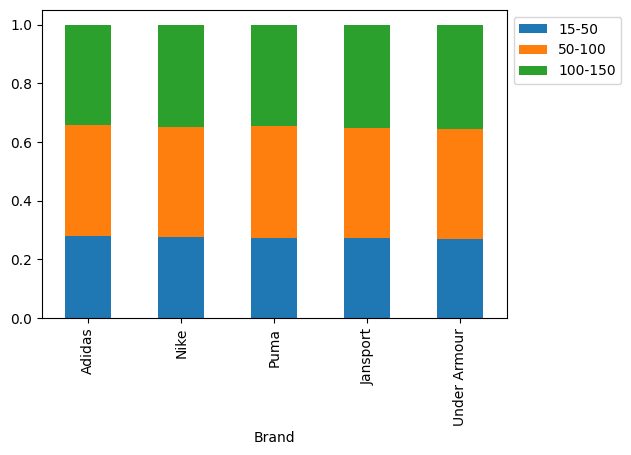

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Brand', 'price_group')

price_group  15-50  50-100  100-150     All
Material                                   
All          78480  108071    99722  286273
Polyester    21343   28874    27986   78203
Leather      20319   27253    24461   72033
Nylon        19123   26586    23599   69308
Canvas       17695   25358    23676   66729
------------------------------------------------------------------------------------------------------------------------


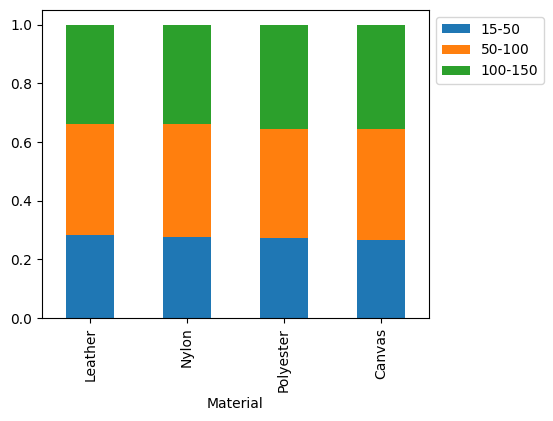

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Material', 'price_group')

price_group  15-50  50-100  100-150     All
Size                                       
All          78744  108726   100537  288007
Medium       27154   38222    35023  100399
Large        26663   36032    33745   96440
Small        24927   34472    31769   91168
------------------------------------------------------------------------------------------------------------------------


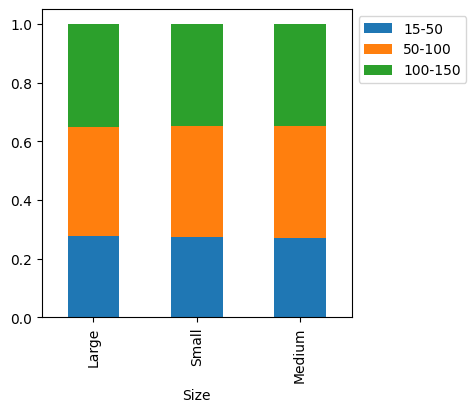

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Size', 'price_group')

price_group         15-50  50-100  100-150     All
Laptop Compartment                                
All                 78448  108613   100063  287124
Yes                 40060   54563    50814  145437
No                  38388   54050    49249  141687
------------------------------------------------------------------------------------------------------------------------


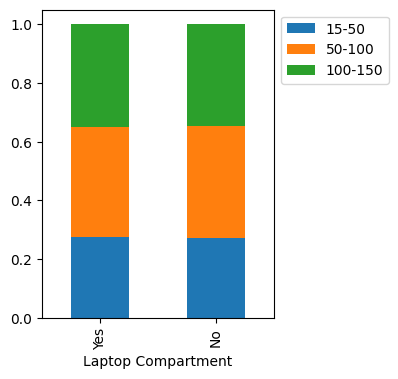

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Laptop Compartment', 'price_group')

price_group  15-50  50-100  100-150     All
Waterproof                                 
All          78644  108520   100321  287485
Yes          40065   54613    50547  145225
No           38579   53907    49774  142260
------------------------------------------------------------------------------------------------------------------------


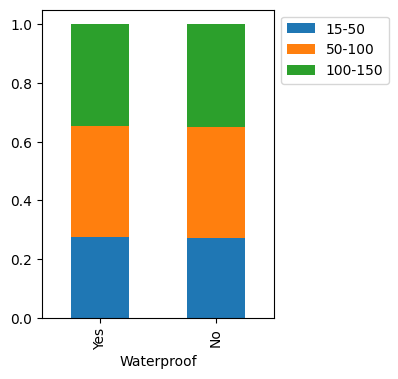

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Waterproof', 'price_group')

price_group  15-50  50-100  100-150     All
Style                                      
All          78643  108171    99833  286647
Messenger    26818   37326    34067   98211
Tote         26484   35819    33309   95612
Backpack     25341   35026    32457   92824
------------------------------------------------------------------------------------------------------------------------


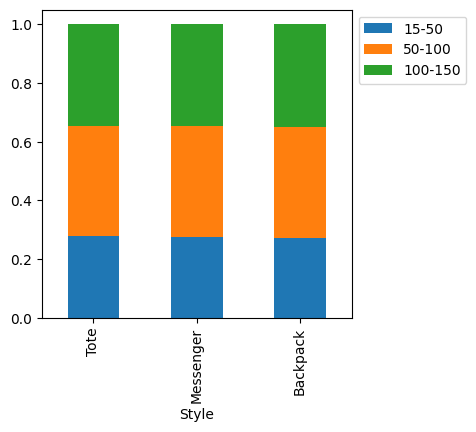

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Style', 'price_group')

price_group  15-50  50-100  100-150     All
Color                                      
All          78092  107387    99223  284702
Pink         13883   19095    17753   50731
Gray         13459   19348    16625   49432
Red          13154   16979    16132   46265
Black        13029   16984    15477   45490
Blue         12470   17835    16990   47295
Green        12097   17146    16246   45489
------------------------------------------------------------------------------------------------------------------------


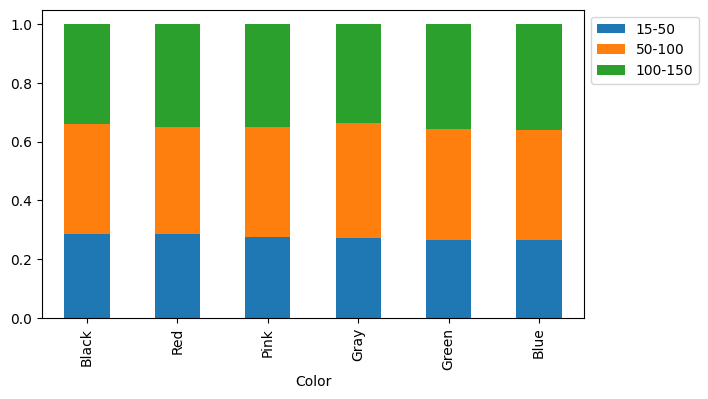

In [ ]:
# visualization of brand by price groups created
stacked_barplot(df_w_price_groups, 'Color', 'price_group')

pairplot (bivariate) without target variable in hue and correlation table of all numeric cols

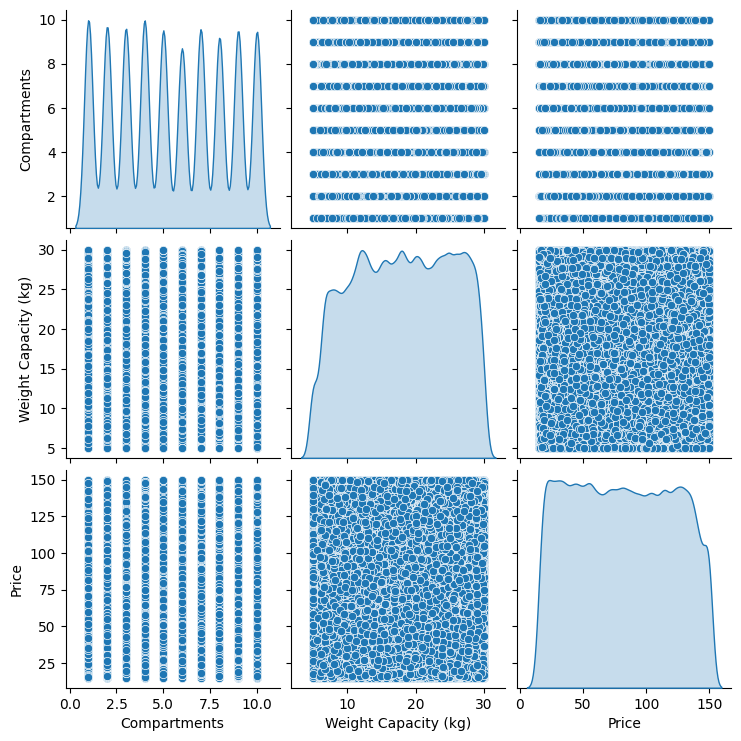

In [ ]:
# plot the variable distributions together and to see if any patterns appear with another variable
sns.pairplot(df,diag_kind='kde');